<a href="https://colab.research.google.com/github/PhilipPfeffer/haptic_vest/blob/main/image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from tensorflow import keras
from pycocotools.coco import COCO     # https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/coco.py

In [8]:
# BORROWED FROM DATA_PIPELINE
# TODO: CALL FROM DATA_PIPELINE
def create_coco(path_to_instances_file, datasetName='val2017'):
  annotations=f'{path_to_instances_file}instances_{datasetName}.json'
  print(annotations)
  
  # This line loads annotations from an instances_{datasetName}.json file into a COCO object so we can use the pycoco API
  coco = COCO(annotations)
  return coco

#USAGE
dataset_name='train2017'
path_to_instances_file ='/content/drive/My Drive/Haptic Vest/coco_dataset/annotations/'
coco = create_coco(path_to_instances_file, dataset_name)

/content/drive/My Drive/Haptic Vest/coco_dataset/annotations/instances_train2017.json
loading annotations into memory...
Done (t=25.17s)
creating index...
index created!


Download the images

In [9]:
dataset ='/content/drive/My Drive/Haptic Vest/dataset_person_car'

In [10]:
train_ids = np.loadtxt(dataset, dtype=(int, int))

In [13]:
x_train_ids, y_train_ids = train_ids[:,0], train_ids[:,1]
assert(x_train_ids.shape == y_train_ids.shape)
x_train_ids[0], y_train_ids[0];

In [42]:
download_imgs_dir = '/content/drive/My Drive/Haptic Vest/person_car_other_imgs'
coco.download(download_imgs_dir, x_train_ids)

downloaded 0/77650 images (t=0.6s)
downloaded 1/77650 images (t=0.6s)
downloaded 2/77650 images (t=0.6s)
downloaded 3/77650 images (t=0.4s)
downloaded 4/77650 images (t=0.5s)
downloaded 5/77650 images (t=0.4s)
downloaded 6/77650 images (t=0.5s)
downloaded 7/77650 images (t=0.5s)
downloaded 8/77650 images (t=0.4s)
downloaded 9/77650 images (t=0.5s)
downloaded 10/77650 images (t=0.4s)
downloaded 11/77650 images (t=0.4s)
downloaded 12/77650 images (t=0.5s)
downloaded 13/77650 images (t=0.4s)
downloaded 14/77650 images (t=0.6s)
downloaded 15/77650 images (t=0.6s)
downloaded 16/77650 images (t=0.5s)
downloaded 17/77650 images (t=0.6s)
downloaded 18/77650 images (t=0.6s)
downloaded 19/77650 images (t=0.6s)
downloaded 20/77650 images (t=0.6s)
downloaded 21/77650 images (t=0.5s)
downloaded 22/77650 images (t=0.4s)
downloaded 23/77650 images (t=0.5s)
downloaded 24/77650 images (t=0.5s)
downloaded 25/77650 images (t=0.5s)
downloaded 26/77650 images (t=0.5s)
downloaded 27/77650 images (t=0.5s)
do

KeyboardInterrupt: ignored

In [2]:
import skimage
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
import os

In [48]:
image_count = 0
for entry in os.scandir(download_imgs_dir):
  image_count += 1
  # print(entry.path)
print(f"{image_count} images downloaded")

483


In [91]:
# Process from downloads directory

processed_count = 0
for entry in os.scandir(download_imgs_dir):
  processed_count += 1
  img = io.imread(entry.path)
  img_width = img.shape[0]
  img_height = img.shape[1]
  processed = img
  
  # Greyscale
  if len(img.shape) != 2:
    processed = rgb2gray(processed)
  
  # Square (centre-crop)
  if img_height != img_width:
    if img_width < img_height:
      height_start = int((img_height - img_width) / 2)
      processed = img[:, height_start:height_start+img_width]
    else:
      width_start = int((img_width - img_height) / 2)
      processed = img[width_start:width_start+img_height,:]
  
  # Resize (96x96)
  if img_height != 96:
    processed = resize(processed, (96,96))

  # io.imshow(processed)
  io.imsave(entry.path, processed)

assert(processed_count == image_count)

(96, 96)
/content/drive/My Drive/Haptic Vest/person_car_other_imgs/000000394532.jpg


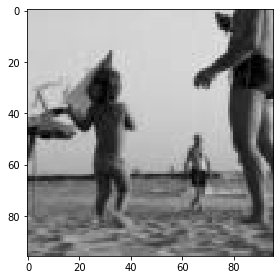

In [94]:
# Example image
for i, entry in enumerate(os.scandir(download_imgs_dir)):
  if i == 400:
    img = io.imread(entry.path)
    io.imshow(entry.path)
    print(img.shape)
    print(entry.path)
    break

#Process from URL
Better than from downloaded images because the original RGB images take up a lot of space.

In [1]:
download_imgs_dir = '/content/drive/My Drive/Haptic Vest/person_car_other_imgs_processed'

In [ ]:
# Process from URLs

processed_count_URL = 0
imgs = coco.loadImgs(x_train_ids)

for img_info in imgs:
  processed_count_URL += 1

  img = io.imread(img_info['coco_url'])
  img_width = img_info['width']
  img_height = img_info['height']
  img_filename = img_info['file_name']
  processed = img

  # Greyscale
  if len(img.shape) != 2:
    processed = rgb2gray(processed)
  
  # Square (centre-crop)
  if img_height != img_width:
    if img_width < img_height:
      height_start = int((img_height - img_width) / 2)
      processed = processed[height_start:height_start+img_width,:]
    else:
      width_start = int((img_width - img_height) / 2)
      processed = processed[:,width_start:width_start+img_height]
  
  # Resize (96x96)
  if img_height != 96:
    processed = resize(processed, (96,96))

  io.imsave(download_imgs_dir+'/' + img_filename, processed)

print(processed_count_URL)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/Haptic Vest/person_car_other_imgs_processed/000000489616.jpg is a low contrast image


In [3]:
image_count = 0
for entry in os.scandir(download_imgs_dir):
  image_count += 1
  print(image_count)
  # print(entry.path)
print(f"{image_count} images downloaded")

Streaming output truncated to the last 5000 lines.
55398
55399
55400
55401
55402
55403
55404
55405
55406
55407
55408
55409
55410
55411
55412
55413
55414
55415
55416
55417
55418
55419
55420
55421
55422
55423
55424
55425
55426
55427
55428
55429
55430
55431
55432
55433
55434
55435
55436
55437
55438
55439
55440
55441
55442
55443
55444
55445
55446
55447
55448
55449
55450
55451
55452
55453
55454
55455
55456
55457
55458
55459
55460
55461
55462
55463
55464
55465
55466
55467
55468
55469
55470
55471
55472
55473
55474
55475
55476
55477
55478
55479
55480
55481
55482
55483
55484
55485
55486
55487
55488
55489
55490
55491
55492
55493
55494
55495
55496
55497
55498
55499
55500
55501
55502
55503
55504
55505
55506
55507
55508
55509
55510
55511
55512
55513
55514
55515
55516
55517
55518
55519
55520
55521
55522
55523
55524
55525
55526
55527
55528
55529
55530
55531
55532
55533
55534
55535
55536
55537
55538
55539
55540
55541
55542
55543
55544
55545
55546
55547
55548
55549
55550
55551
55552
55553
55554
55555
5

In [14]:
x_train_ids.shape[0] - image_count

17255